In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정 - 윈도우 
plt.rcParams['font.family'] = 'Malgun Gothic'

# 글자 크기
plt.rcParams['font.size'] = 15

# 폰트 설정 시 - 기호 깨는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 크기
plt.rcParams['figure.figsize'] = 16,8

# sns.set_style('ticks')

In [ ]:
drink = pd.read_csv('data2/drinks.csv')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [ ]:
# 대륙의 결측치는 사실 북아메리카를 나타내는 NA라는 단어이다
# 이에 결측치를 NA로 설정해준다.
drink['continent'].fillna("NA",inplace=True)
drink.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
drink['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [ ]:
# 전체 술 소비량을 계산한다.
total_servings = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']
drink['total_servings'] = total_servings
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [ ]:
# 술 소비량 대비 알코올 비율을 계산한다.
a1 = drink['total_litres_of_pure_alcohol'] /drink['total_servings']
a1

0           NaN
1      0.017818
2      0.017949
3      0.017842
4      0.018495
         ...   
188    0.017661
189    0.017544
190    0.016667
191    0.045455
192    0.054651
Length: 193, dtype: float64

In [ ]:
# 전체 술 소비량이 0인 국가는 계산 자체가 성립되지 않으므로 결과가 결측치로 나온다
# 이에 결측치를 0으로 채워준다
a1.fillna(0,inplace=True)
a1.isna().sum()

0

In [ ]:
# 알코올 비율을 데이터프레임에 추가한다.
drink['alcohol_rate'] = a1
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [ ]:
country_with_rank = drink[['country','alcohol_rate']]
country_with_rank.sort_values('alcohol_rate',ascending=False,inplace=True)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


In [ ]:
# 막대 그래프를 그려서 한국에 해당하는 막대 표시하기
# x좌표 구하기
x_pos = list(range(len(country_with_rank)))
print(x_pos)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192]


In [ ]:
# y 좌표
rank = country_with_rank['alcohol_rate']

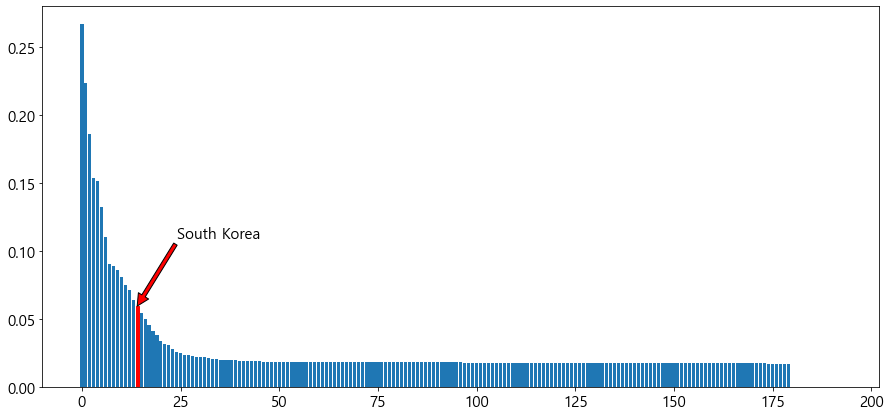

In [ ]:
# 시각화
# 막대 그래프를 그리는 함수는 각 막대들을 제어할 수 있는 객체가 담긴 리스트를 반환한다.
bar_list = plt.bar(x_pos, rank)
# print(bar_list)

# 한국에 해당하는 막대의 인덱스를 가져온다
# 국가 이름들을 추출한다.
names = country_with_rank['country'].tolist()
# 한국의 인덱스를 추출한다.
korean_idx = names.index('South Korea')

# 한국에 해당하는 막대를 붉은색으로 설정한다.
bar_list[korean_idx].set_color('r')

# 어노테이션의 화살표 설정
arrow_dict = {
    'facecolor' : 'red'
}

plt.annotate('South Korea', xy=(korean_idx,rank.values[korean_idx]),
            arrowprops=arrow_dict, # 어노테이션 내의 화살표 옵션 설정
            xytext=(korean_idx + 10, rank.values[korean_idx] + 0.05)) # 어노테이션 내의 문자열 위치

plt.show()